# Process assessment 3


## Quiz

Answer these 5 questions.

1. **Which of the following best describes correlation?**
   - A) A measure of the association between two variables
   - B) A method to calculate the average of a dataset
   - C) A test for causation between two variables
   - D) A measure of the variance of a single variable  
   - A

2. **If two variables have a correlation coefficient of -1, what does this imply?**
   - A) There is no relationship between the variables
   - B) There is a perfect positive relationship between the variables
   - C) There is a perfect negative relationship between the variables
   - D) The variables have a nonlinear relationship  
   - C

3. **Which correlation coefficient value indicates the strongest positive relationship?**
   - A) -0.9
   - B) 0.5
   - C) 0.7
   - D) 0.95  
   - D

4. **What does covariance measure in a dataset?**
   - A) The average value of a single variable
   - B) The linear relationship between two variables, indicating both direction and strength
   - C) The tendency of two variables to vary together, indicating only direction
   - D) The degree of causation between two variables
      C

5. **In which situation is Spearman correlation more appropriate than Pearson correlation?**
    - A) When the data are normally distributed and linear
    - B) When both variables are categorical
    - C) When the relationship between the variables is monotonic but not necessarily linear
    - D) When analysing data with multiple independent variables
      C

## Coding

A transit rider, Jake, often takes the northbound C bus at the 3rd & Pike bus stop in downtown Seattle. The bus is supposed to arrive every 10 minutes, but Jake notices that he sometimes waits a long time for the bus. He wants to know how late the bus usually is. Jake was able to acquire the scheduled arrival and actual arrival times for his bus from the Washington State Transportation Center. From these data, he can calculate the minutes that each bus is late to arrive at his stop.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # you need to add this library to your requirements.txt and run `pip install -r requirements.txt` again
times = pd.read_csv('./data/seattle_bus_times_NC.csv')
times


,route,direction,scheduled,actual,minutes_late
0,C,northbound,2016-03-26 06:30:28,2016-03-26 06:26:04,-4.400000
1,C,northbound,2016-03-26 01:05:25,2016-03-26 01:10:15,4.833333
2,C,northbound,2016-03-26 21:00:25,2016-03-26 21:05:00,4.583333
3,C,northbound,2016-03-26 22:30:25,2016-03-26 22:34:28,4.050000
4,C,northbound,2016-03-26 20:15:25,2016-03-26 20:23:39,8.233333
...,...,...,...,...,...
1429,C,northbound,2016-04-10 13:15:28,2016-04-10 13:11:36,-3.866667
1430,C,northbound,2016-04-10 10:45:28,2016-04-10 10:40:56,-4.533333
1431,C,northbound,2016-04-10 06:15:28,2016-04-10 06:11:37,-3.850000
1432,C,northbound,2016-04-10 17:00:28,2016-04-10 16:56:54,-3.566667


The `minutes_late` column in the data table records how late each bus was. Notice that some of the times are negative, meaning that the bus arrived early. Let’s examine a histogram of the minutes each bus is late:

In [11]:
import sys
print(sys.executable)


/usr/local/bin/python3


In [3]:
fig = px.histogram(times, x='minutes_late', width=900, height=500)
fig.update_xaxes(range=[-12, 60], title_text='Minutes late')
fig


## Task: Define a MAE loss function

We want to model how late the northbound C bus is by a constant, which we call $\theta$, and we want to use the data of actual minutes each bus is late to figure out a good value for $\theta$.

To do this, we use a *loss function*---a function that measures how far away our constant, $ \theta $, is from the actual data.

A loss function is a mathematical function that takes in $\theta$ and a
data value $y$. It outputs a single number, the *loss*, that
measures how far away $\theta$ is from $y$. We write the loss function
as ${\cal l}(\theta, y)$.


In class, we encountered the MSE (mean squared errors) loss function. Let's explore the *absolute error* loss function. Here's the idea behind absolute loss. For some value of $\theta$ and data value $y$:

1. Find the error, $y - \theta$.
1. Take the absolute value of the error, $|y - \theta|$. 

So the loss function for each individual data point is ${\cal l}(\theta, y) = | y - \theta |$.

Define a mean absolute error (MAE) loss function that takes in a candidate theta and the y values and outputs the mean absolute error.

$$
L(\theta, {\mathbf y})
= \frac{1}{n} \sum_{i = 1}^{n} |y_i - \theta|
$$

Notice that the name MAE tells you how to compute it: take the Mean of the
Absolute value of the Errors, $ \{ y_i - \theta \} $.

Write a simple Python function to compute this loss. The function should take as input a theta value and an array of y-values, and output a single number representing the model's loss (i.e. total error) on the provided data.

In [7]:
# define a MAE loss function 
def mae_loss(theta, y_vals):
    return (np.mean(np.abs(y_vals - theta)))

Taking the absolute value of the error is a simple way to convert negative
errors into positive ones. For instance, the point,
$y=4$, is equally far away from $\theta = 2$ and $\theta = 6$, so the errors are equally "bad."

The average of the absolute errors is called the _mean absolute error_ (MAE). The MAE is the average of each of the individual absolute errors.

Let's now try different theta values (i.e. different constant models) and compute the associated loss. Without modifying the code, please run the following cell. 

In [6]:
# run this cell without editing its content. You can read what it does in the description. 
def try_thetas(thetas, y_vals, xlims, loss_fn=mae_loss, figsize=(5, 3),
               rug_height=0.1, cols=3):
    """
    Description of the function: Plot the data as a rug plot and plot theta. 

    Description of the parameters:
    thetas: array of theta values
    y_vals: array of y values
    xlims: (x-lower, x-upper) tuple of the x-axis limits 
    loss_fn: function that calculates the loss
    figsize: tuple specifing the figure size
    rug_height: height of the rug plot
    cols: number of columns in the plot
    """
    if not isinstance(y_vals, np.ndarray):
        y_vals = np.array(y_vals)
    rows = int(np.ceil(len(thetas) / cols))
    plt.figure(figsize=figsize)
    for i, theta in enumerate(thetas):
        ax = plt.subplot(rows, cols, i + 1)
        sns.rugplot(y_vals, height=rug_height, ax=ax)
        plt.axvline(theta, linestyle='--',
                    label=rf'$ \theta = {theta} $')
        plt.title(f'Avg loss = {loss_fn(theta, y_vals):.2f}')
        plt.xlim(*xlims)
        plt.yticks([])
        plt.legend()
    plt.tight_layout()

## Task 1: Interpret the graph
Let's see how this loss function behaves when we have just five data points $[–1, 0, 2, 5, 10]$. Pick a few values of $\theta$ and plot what the MAE outputs for each value is. 

Hints: 
1. You might want to try different centrality measures of the five data points.
2. You might want to input your thetas from the smallest to the largest

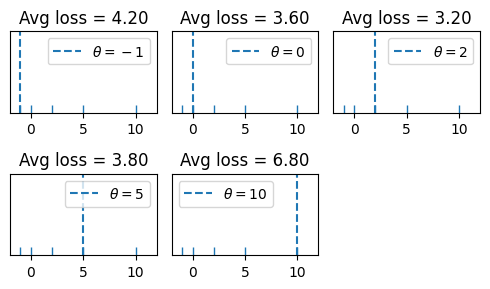

In [10]:
y_vals = np.array([-1, 0, 2, 5, 10])
thetas = [-1, 0, 2, 5, 10]  
xlims = (-2, 12)


# Plot using try_thetas function
try_thetas(thetas, y_vals, xlims, loss_fn=mae_loss)
plt.show()

Going from the top left to the bottom right we are moving theta (the deashed line) from left to right. How does the MAE loss change in the title of graph? 

Double click to enter your answer here: 
The MAE is lowest when theta = 2, which is close to the median of the y_vals.
[−1,0,2,5,10].
As theta moves away from the center of y_vals, the MAE increases, especially when theta is on the extremes (like -1 and 10).

This pattern is typical for the MAE, as values closer to the central tendency of the data (like the median) usually yield lower errors when using an absolute error metric.

Let's now check what the average MAE loss is for the dataset of bus late times. 

## Task 2: plot the MAE loss function on toy data
So far, we have found the best value of $ \theta $ by simply trying out a few  values and then picking the one with the smallest loss. To get a better sense of the MAE as a function of $\theta$, we can try many more values of $\theta$ and plot a curve that shows how $L(\theta, {\mathbf{y}})$ changes as $\theta$ changes. 

Draw the curve for the preceding example with the five data values, $[–1, 0, 2, 5, 10]$:

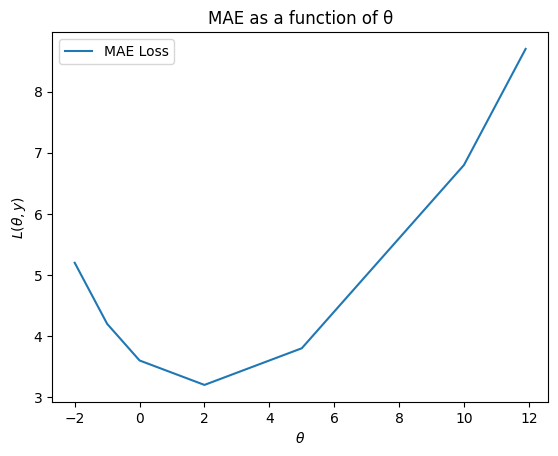

In [12]:
# Your toy data
y_vals = np.array([-1, 0, 2, 5, 10])


thetas = np.arange(-2, 12, 0.1)


losses = []


for theta in thetas:
    loss = mae_loss(theta, y_vals)
    losses.append(loss)

# Step 4: Plot the MAE loss curve
plt.plot(thetas, losses, label="MAE Loss")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$L(\theta, y)$")
plt.title("MAE as a function of θ")
plt.legend()
plt.show()

## Task 3: plot the MAE loss function on the bus data
Depending on how many theta values you tried, the figure migth look piecewise linear, where the line segments connect at given locations. With a lot of data, the flat pieces are less obvious. Our bus data have over 1,400 points and the MAE curve should appear smoother.

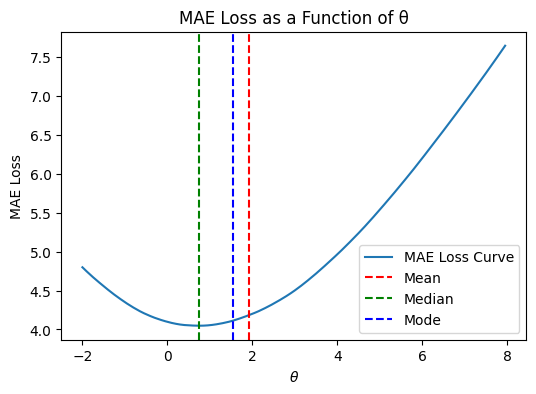

In [15]:
y_vals = times['minutes_late'] 
thetas = np.arange(-2, 8, 0.05)

# Compute MAE for each theta and store in `losses`
losses = []
for theta in thetas:
    loss = mae_loss(theta, y_vals)
    losses.append(loss)

# Plot the losses against thetas
plt.figure(figsize=(6, 4))
plt.plot(thetas, losses, label="MAE Loss Curve")

#    Calculate mean, median, and mode manually
mean_y = np.mean(y_vals)
median_y = np.median(y_vals)
mode_y = max(set(y_vals), key=list(y_vals).count)  # Finding mode manually

# Step 5: Plot vertical dashed lines for mean, median, and mode
plt.axvline(mean_y, color="r", linestyle="--", label="Mean")
plt.axvline(median_y, color="g", linestyle="--", label="Median")
plt.axvline(mode_y, color="b", linestyle="--", label="Mode")

# Step 6: Add labels, title, and legend
plt.xlabel(r"$\theta$")
plt.ylabel("MAE Loss")
plt.title("MAE Loss as a Function of θ")
plt.legend()
plt.show()

## Task 4: Interpretation
What value minimises the MAE loss function? 

Double click to add you answer here:
In the graph, the point that minimizes the MAE loss is the lowest point of the curve, which is appoximately around 𝜃 = 2.

### Task 5: Auto-Correlation
We learned in class about correlation. Do you know there is also [autocorrelation](https://www.investopedia.com/terms/a/autocorrelation.asp)? 

If a bus is delayed, is the next one going to be delayed too? 
Sort the `times` dataframe chronologically based on the `scheduled` timestamp. Then calculate the correlation coefficient (and p-value) between the `minutes_late` column and a copy of itself that is shifted by 1 position. For example, if the column is [first bus, second bus, third bus, etc...], the shifted column should be [second bus, third bus, fourth bus etc...].

**Hint:**
- What happens at the beginning and the end of the column? 

In [20]:
from scipy import stats

def analyze_bus_delays(times):
    # Sorting dataframe chronologically by scheduled timestamp
    times_sorted = times.sort_values('scheduled')
    
    # Get the minutes_late column
    delays = times_sorted['minutes_late']
    
    # Creating the  shifted version (shift by 1 position)
    delays_shifted = delays.shift(1)
    
    # Calculating correlation coefficient and p-value
    correlation, p_value = stats.pearsonr(
        delays[1:],  # Removing the  first row (has no previous delay to compare with)
        delays_shifted[1:]  # Removing the first row (NaN from shift)
    )
    print(f"Correlation coefficient: {correlation:.3f}")
    print(f"P-value: {p_value:.2e}")
    return (correlation, p_value)


analyze_bus_delays(times)


Correlation coefficient: 0.523
P-value: 3.19e-101


(0.5225584548451019, 3.192962452654811e-101)

Yes, there is evidence that if a bus is delayed, the next one is more likely to be delayed too. 

The correlation coefficient is 0.523, which tells us:

There is a moderate positive relationship between consecutive bus delays
This is on a scale from -1 to +1, where 0.523 shows a meaningful connection
It means about 52.3% of the variation in delays can be explained by the previous bus's delay


Additionally we can be very confident in this conclusion because:

The p-value is extremely small (3.19e-101)
This means there's virtually no chance this correlation occurred randomly
We had a large sample size (1434 bus trips) to support this finding



In practical terms, if you see a delayed bus, there's a moderate likelihood the next bus will also be delayed, though not necessarily by the same amount. This makes intuitive sense because:

A delayed bus might have more passengers waiting at subsequent stops
Traffic conditions causing one delay might persist for the next bus
Delays can create a "cascade effect" through the system